In [1]:
import sklearn.naive_bayes as nb
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
adult_dat = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*', engine='python', na_values="?")

adult_dat.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df=adult_dat.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
Age               30162 non-null int64
Workclass         30162 non-null object
fnlwgt            30162 non-null int64
Education         30162 non-null object
Education-Num     30162 non-null int64
Martial Status    30162 non-null object
Occupation        30162 non-null object
Relationship      30162 non-null object
Race              30162 non-null object
Sex               30162 non-null object
Capital Gain      30162 non-null int64
Capital Loss      30162 non-null int64
Hours per week    30162 non-null int64
Country           30162 non-null object
Target            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.head(3)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [7]:
df.Workclass.value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: Workclass, dtype: int64

In [8]:
pd.get_dummies(df.Workclass)

,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
df=pd.concat([df, pd.get_dummies(df['Workclass'], prefix='WC')], axis=1).drop('Workclass', axis=1)

In [10]:
df

,Age,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,...,Hours per week,Country,Target,WC_Federal-gov,WC_Local-gov,WC_Private,WC_Self-emp-inc,WC_Self-emp-not-inc,WC_State-gov,WC_Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,40,United-States,<=50K,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,13,United-States,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,40,United-States,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,40,United-States,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,40,Cuba,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,37,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,...,40,United-States,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,49,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,...,16,Jamaica,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,52,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,45,United-States,>50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,31,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,...,50,United-States,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,42,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,...,40,United-States,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
df.Education.value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: Education, dtype: int64

In [12]:
df=pd.concat([df, pd.get_dummies(df['Education'], prefix='ED')], axis=1).drop('Education', axis=1)

In [13]:
df['Martial Status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: Martial Status, dtype: int64

In [14]:
df=pd.concat([df, pd.get_dummies(df['Martial Status'], prefix='MS')], axis=1).drop('Martial Status', axis=1)

In [15]:
df['Occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: Occupation, dtype: int64

In [16]:
df=pd.concat([df, pd.get_dummies(df['Occupation'], prefix='OC')], axis=1).drop('Occupation', axis=1)

In [17]:
df['Relationship'].value_counts()

Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: Relationship, dtype: int64

In [18]:
df=pd.concat([df, pd.get_dummies(df['Relationship'], prefix='RE')], axis=1).drop('Relationship', axis=1)

In [19]:
df['Race'].value_counts()

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: Race, dtype: int64

In [20]:
df=pd.concat([df, pd.get_dummies(df['Race'], prefix='RC')], axis=1).drop('Race', axis=1)

In [21]:
df['Sex'].value_counts()

Male      20380
Female     9782
Name: Sex, dtype: int64

In [22]:
df.Sex=df.Sex.apply(lambda x: 1 if x=='Female' else 0)

In [23]:
df['Country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [24]:
df=pd.concat([df, pd.get_dummies(df['Country'], prefix='CT')], axis=1).drop('Country', axis=1)

In [25]:
y=df.Target.apply(lambda x: 1 if x=='>50K' else 0)
df.drop('Target', axis=1, inplace=True)

In [26]:
len(df.columns)

103

In [80]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [147]:
x_train, x_test, y_train, y_test = train_test_split(df, y)
print x_train.shape, x_test.shape, y_train.shape, y_test.shape

(22621, 103) (7541, 103) (22621,) (7541,)


In [148]:
def print_confusion_matrix(target, prediction):
    print confusion_matrix(target, prediction)
    print classification_report(target, prediction)
    sns.heatmap(confusion_matrix(target, prediction))

def classifier_eval(model, train_data, test_data, train_target, test_target, graph=True):
    model.fit(train_data, train_target)
    print "Train data score: ", model.score(train_data, train_target)
    print "Test data score: ", model.score(test_data, test_target)
    if graph:
        print_confusion_matrix(test_target, model.predict(test_data))

Train data score:  0.987135847222
Test data score:  0.84299164567
[[5274  439]
 [ 745 1083]]
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      5713
          1       0.71      0.59      0.65      1828

avg / total       0.84      0.84      0.84      7541



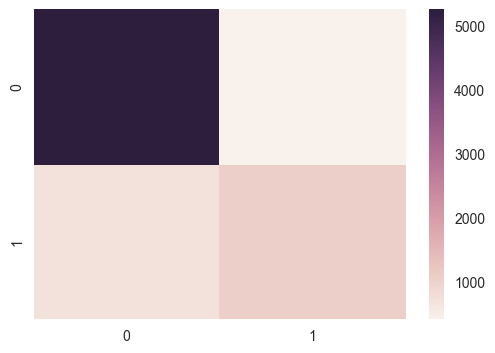

In [149]:
rfc=RandomForestClassifier()
classifier_eval(rfc, x_train, x_test, y_train, y_test)

Train data score:  0.78917819725
Test data score:  0.792467842461
[[5506  207]
 [1358  470]]
             precision    recall  f1-score   support

          0       0.80      0.96      0.88      5713
          1       0.69      0.26      0.38      1828

avg / total       0.78      0.79      0.75      7541



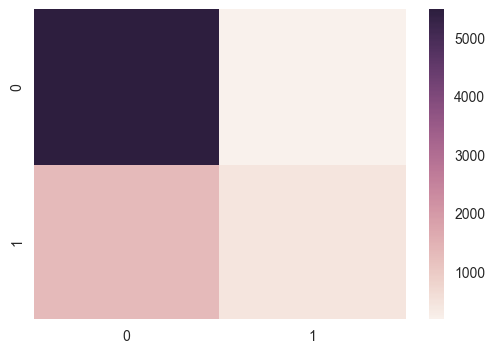

In [150]:
lm=LogisticRegression()
classifier_eval(lm, x_train, x_test, y_train, y_test)

Train data score:  0.78917819725
Test data score:  0.792467842461
[[5506  207]
 [1358  470]]
             precision    recall  f1-score   support

          0       0.80      0.96      0.88      5713
          1       0.69      0.26      0.38      1828

avg / total       0.78      0.79      0.75      7541



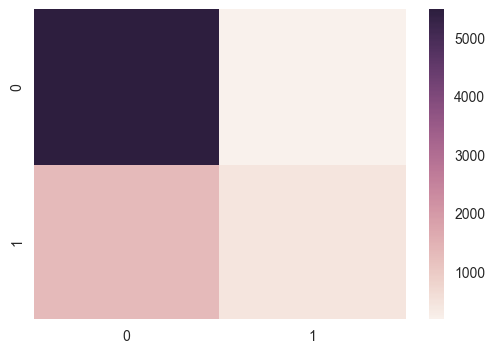

In [151]:
mnb=MultinomialNB()
classifier_eval(lm, x_train, x_test, y_train, y_test)

Train data score:  0.786304761063
Test data score:  0.790080891128
[[5404  309]
 [1274  554]]
             precision    recall  f1-score   support

          0       0.81      0.95      0.87      5713
          1       0.64      0.30      0.41      1828

avg / total       0.77      0.79      0.76      7541



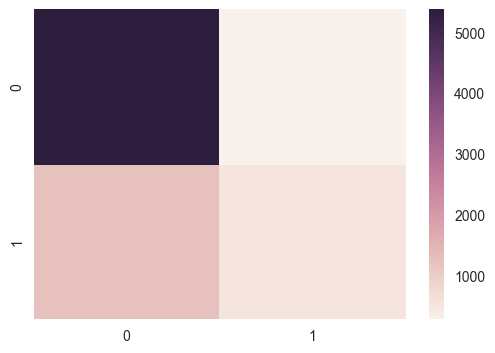

In [152]:
gnb=GaussianNB()
classifier_eval(gnb, x_train, x_test, y_train, y_test)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [153]:
# df_transformed = StandardScaler().fit_transform(df)
# x_train, x_test, y_train, y_test = train_test_split(df_transformed, y)
# print x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [154]:
x_train_trans=StandardScaler().fit_transform(x_train)
x_test_trans=StandardScaler().fit_transform(x_test)

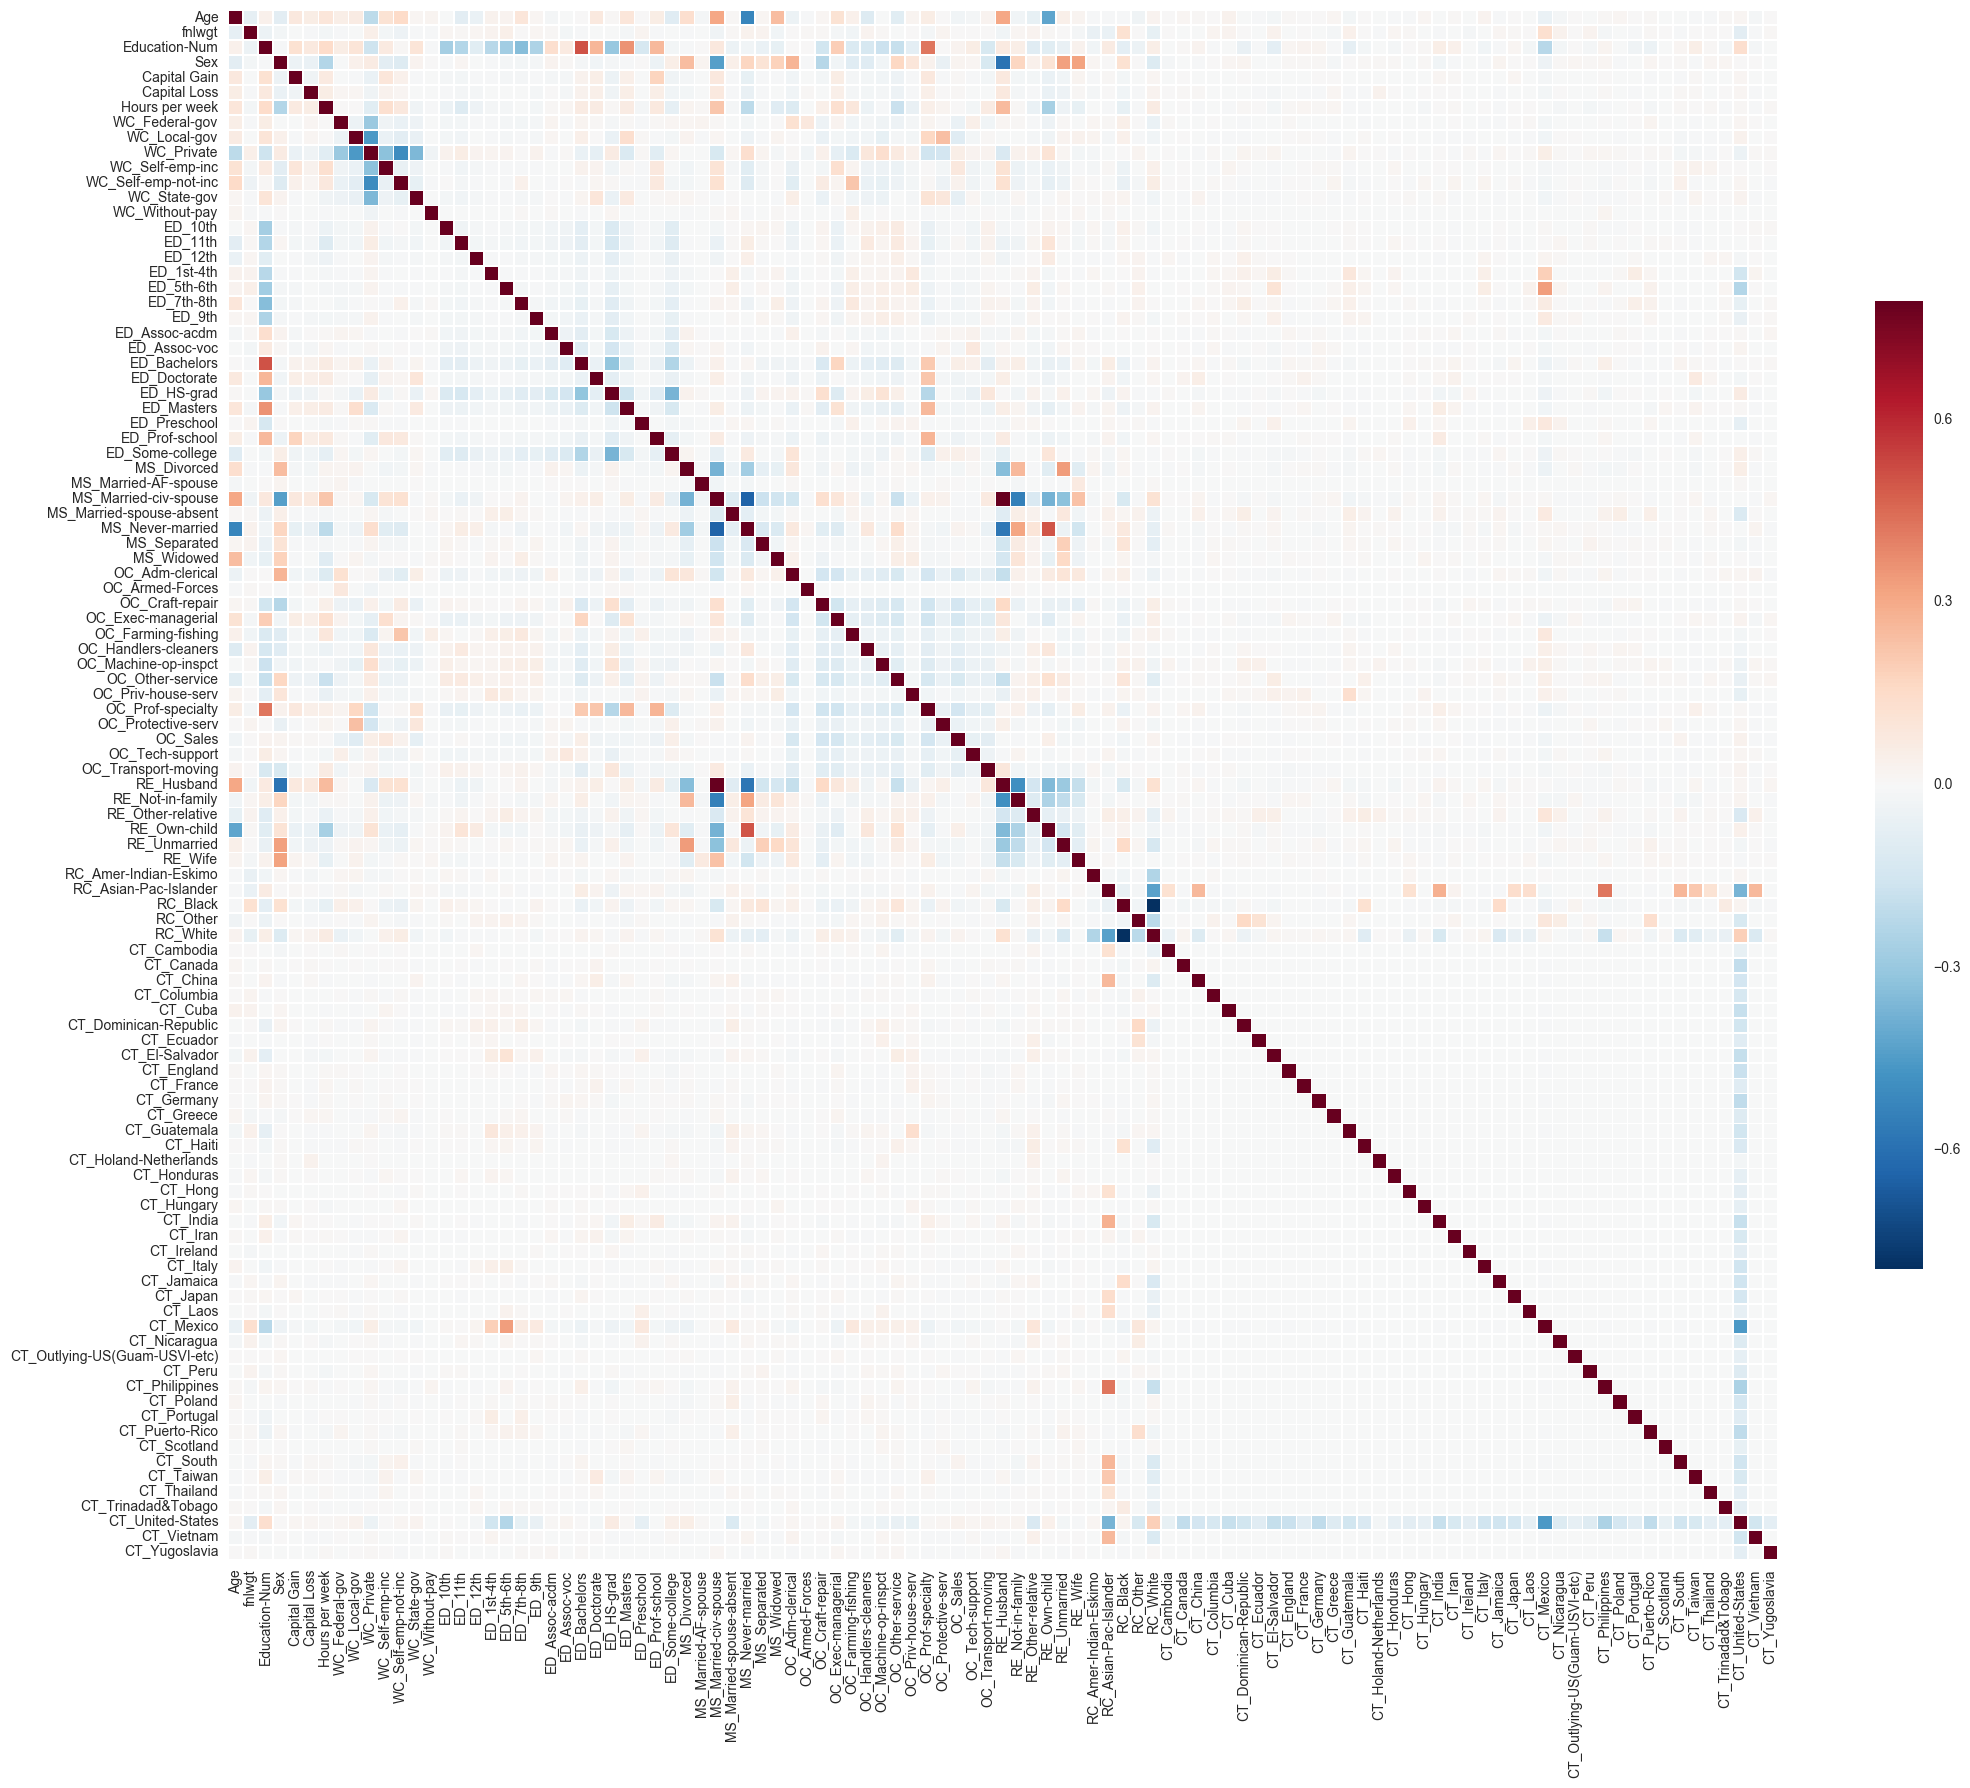

In [155]:
plt.figure(figsize=(25,25))
sns.heatmap(pd.DataFrame(x_train).corr(), vmax=.3, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

In [156]:
x_train_trans.shape

(22621, 103)

In [161]:
lda_train = LinearDiscriminantAnalysis().fit_transform(x_train_trans, y_train)
lda_test = LinearDiscriminantAnalysis().fit_transform(x_test_trans, y_test)

In [162]:
print lda_train.shape
print lda_test.shape

(22621, 1)
(7541, 1)


In [163]:
rfc=RandomForestClassifier()
classifier_eval(rfc, x_train, x_test, y_train, y_test, graph=False)
print
classifier_eval(rfc, x_train_trans, x_test_trans, y_train, y_test, graph=False)

Train data score:  0.987533707617
Test data score:  0.845643813818

Train data score:  0.985809645904
Test data score:  0.838217743005


In [164]:
gnb=GaussianNB()
classifier_eval(gnb, x_train, x_test, y_train, y_test, graph=False)
print
classifier_eval(gnb, x_train_trans, x_test_trans, y_train, y_test, graph=False)

Train data score:  0.786304761063
Test data score:  0.790080891128

Train data score:  0.459175102781
Test data score:  0.757591831322


In [128]:
lm=LogisticRegression()
classifier_eval(lm, x_train, x_test, y_train, y_test, graph=False)
print
classifier_eval(lm, x_train_trans, x_test_trans, y_train, y_test, graph=False)

Train data score:  0.791079085805
Test data score:  0.790743933165

Train data score:  0.851332832324
Test data score:  0.845643813818
